In [29]:
import numpy as np
from tabulate import tabulate
import os
import sys
# print(sys.executable)
from scipy.io import savemat
from scipy.io import loadmat
from scipy.optimize import curve_fit
from matplotlib import font_manager 
font_manager.fontManager.addfont('Arial.ttf')

In [30]:
n2 = 9 ;
k = 6 ;
remove_X_list = [2,5,8] ;  remove_Z_list = [3,4,5] ;

In [31]:
import pickle
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

In [32]:
max_num_cycles = 6 ;

In [ ]:
# import subprocess
# script = "ErrorCorrection_for_experiment_18_6_3.py"
# cycles = range(1, max_num_cycles+1)

# processes = []
# for cycle in cycles:
#     p = subprocess.Popen([sys.executable, script, str(cycle)])
#     processes.append(p)

# for p in processes:
#     p.wait()

## Load the results

In [33]:
set_exp_x_devents = {}
set_exp_num_x = []
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_exp_x_devents[f"cycle_{cycle}"] = data['dict_cycle_x_devents']
    set_exp_num_x.append(data['num_instance_x'][0][0])

set_exp_z_devents = {}
set_exp_num_z = []
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_exp_z_devents[f"cycle_{cycle}"] = data['dict_cycle_z_devents']
    set_exp_num_z.append(data['num_instance_z '][0][0])

exp_X_logic_error = [];
exp_X_logic_error_perbit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    exp_X_logic_error.append( data['logical_error_probability'][0][0] )
    exp_X_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

exp_Z_logic_error = [];
exp_Z_logic_error_perbit  = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    exp_Z_logic_error.append( data['logical_error_probability'][0][0]  )
    exp_Z_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

In [34]:
# Pauli+ sim results
sim_Z_logic_error = [];
sim_Z_logic_error_perbit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Pauli_plus_sim/Numerical_results/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    sim_Z_logic_error.append( data['logical_error_probability'][0][0]  )
    sim_Z_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

sim_X_logic_error = [];
sim_X_logic_error_perbit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Pauli_plus_sim/Numerical_results/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    sim_X_logic_error.append( data['logical_error_probability'][0][0] )
    sim_X_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

In [35]:
set_sim_num_z = [] ; set_sim_num_x = [] ;
z_retained_frac = [] ; x_retained_frac = [] ;

set_sim_syndrome_Z = {}
for cycle in range(1, max_num_cycles+1):
    fname = './Pauli_plus_sim/Numerical_data/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_sim_syndrome_Z[f"cycle_{cycle}"] = data['syndrome_history_Z']
    set_sim_num_z.append(data["retained_num_samples"][0][0])
    z_retained_frac.append(data["retain_data_fraction"][0][0])

set_sim_syndrome_X = {}
for cycle in range(1, max_num_cycles+1):
    fname = './Pauli_plus_sim/Numerical_data/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_sim_syndrome_X[f"cycle_{cycle}"] = data['syndrome_history_X']
    set_sim_num_x.append(data["retained_num_samples"][0][0])
    x_retained_frac.append(data["retain_data_fraction"][0][0])

In [36]:
# pauli sim results
set_sim_num_x = [40000] * max_num_cycles
set_sim_num_z = [40000] * max_num_cycles

set_pauli_sim_syndrome_Z = {}
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_data/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_pauli_sim_syndrome_Z[f"cycle_{cycle}"] = data['syndrome_history_Z'] ;

set_pauli_sim_syndrome_X = {}
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_data/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_pauli_sim_syndrome_X[f"cycle_{cycle}"] = data['syndrome_history_X'] ;

In [37]:
pauli_sim_Z_logic_error = [];
pauli_sim_Z_logic_error_perbit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_results/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    pauli_sim_Z_logic_error.append( data['logical_error_probability'][0][0]  )
    pauli_sim_Z_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

pauli_sim_X_logic_error = [];
pauli_sim_X_logic_error_perbit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_results/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    pauli_sim_X_logic_error.append( data['logical_error_probability'][0][0] )
    pauli_sim_X_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

## Error detection probability

In [38]:
# exp logical Z state
labels_z = ['Z0', 'Z1', 'Z2', 'Z6', 'Z7', 'Z8']

exp_z_detect = [np.mean(np.mean(set_exp_z_devents[f"cycle_{max_num_cycles}"][f'cycle_{cycle}'][0][0], axis=0)) \
                      for cycle in range(1, max_num_cycles+1)]
exp_z_detect += [np.mean(np.mean(set_exp_z_devents[f"cycle_{max_num_cycles}"]['final'][0][0], axis=0)) ]

# for cycle, prob in  zip(range(1, max_num_cycles+2), exp_z_detect):
#     print( f'The mean probability of error detection in cycle {cycle} is:', prob )

exp_per_z_detect = [ np.mean(set_exp_z_devents[f"cycle_{max_num_cycles}"][f'cycle_{cycle}'][0][0], axis=0)  \
         for cycle in range(1, max_num_cycles+1) ] +  \
            [ np.mean(set_exp_z_devents[f"cycle_{max_num_cycles}"]['final'][0][0], axis=0) ]

In [39]:
np.mean(exp_z_detect)

0.31172333867288

In [40]:
# exp logical X state
labels_x =  ['X0', 'X1', 'X3', 'X4', 'X6', 'X7']

exp_x_detect = [np.mean(np.mean(set_exp_x_devents[f"cycle_{max_num_cycles}"][f'cycle_{cycle}'][0][0], axis=0)) for cycle in range(1, max_num_cycles+1)]
exp_x_detect += [np.mean(np.mean(set_exp_x_devents[f"cycle_{max_num_cycles}"]['final'][0][0], axis=0)) ]

# for cycle, prob in  zip(range(1, max_num_cycles+2), exp_x_detect):
#     print( f'The mean probability of error detection in cycle {cycle} is:', prob )

exp_per_x_detect = [ np.mean(set_exp_x_devents[f"cycle_{max_num_cycles}"][f'cycle_{cycle}'][0][0], axis=0)  \
         for cycle in range(1, max_num_cycles+1) ] +  \
            [ np.mean(set_exp_x_devents[f"cycle_{max_num_cycles}"]['final'][0][0], axis=0) ]

In [41]:
np.mean(exp_x_detect)

0.3121965137320078

In [42]:
# Pauli+
# sim logical Z state
num_zcheck = len(labels_z) ;
temp = np.mean(set_sim_syndrome_Z[f"cycle_{max_num_cycles}"], axis=0)

sim_z_detect = [ np.mean(temp[num_zcheck*cycle:num_zcheck*(cycle+1)]) for cycle in range(max_num_cycles+1) ]
# for cycle in range(max_num_cycles+1) :
#     print( f'The mean probability of error detection in cycle {cycle+1} is:', sim_z_detect[cycle] )
sim_per_z_detect = [ [ temp[i + cycle*num_zcheck ] for cycle in range(max_num_cycles+1) ] for i in range(num_zcheck) ]

In [43]:
np.mean(sim_z_detect)

0.2835827280917652

In [44]:
# Pauli+
# sim logical X state
num_xcheck = len(labels_x) ;
temp = np.mean(set_sim_syndrome_X[f"cycle_{max_num_cycles}"], axis=0)

sim_x_detect = [ np.mean(temp[num_xcheck*cycle:num_xcheck*(cycle+1)]) for cycle in range(max_num_cycles+1) ]
# for cycle in range(max_num_cycles+1) :
#     print( f'The mean probability of error detection in cycle {cycle+1} is:', sim_x_detect[cycle] )
sim_per_x_detect = [ [ temp[i + cycle*num_xcheck ] for cycle in range(max_num_cycles+1) ] for i in range(num_xcheck) ]

In [45]:
np.mean(sim_x_detect)

0.30724871382860586

In [46]:
# Pauli sim
# logical Z state
temp = np.mean(set_pauli_sim_syndrome_Z[f"cycle_{max_num_cycles}"], axis=0)

pauli_sim_z_detect = [ np.mean(temp[num_zcheck*cycle:num_zcheck*(cycle+1)]) for cycle in range(max_num_cycles+1) ]

pauli_sim_per_z_detect = [ [ temp[i + cycle*num_zcheck ] for cycle in range(max_num_cycles+1) ] for i in range(num_zcheck) ]

# logical X state
temp2 = np.mean(set_pauli_sim_syndrome_X[f"cycle_{max_num_cycles}"], axis=0)
pauli_sim_x_detect = [ np.mean(temp2[num_xcheck*cycle:num_xcheck*(cycle+1)]) for cycle in range(max_num_cycles+1) ]
pauli_sim_per_x_detect = [ [ temp2[i + cycle*num_xcheck ] for cycle in range(max_num_cycles+1) ] for i in range(num_xcheck) ]

In [47]:
# sim_per_x_detect

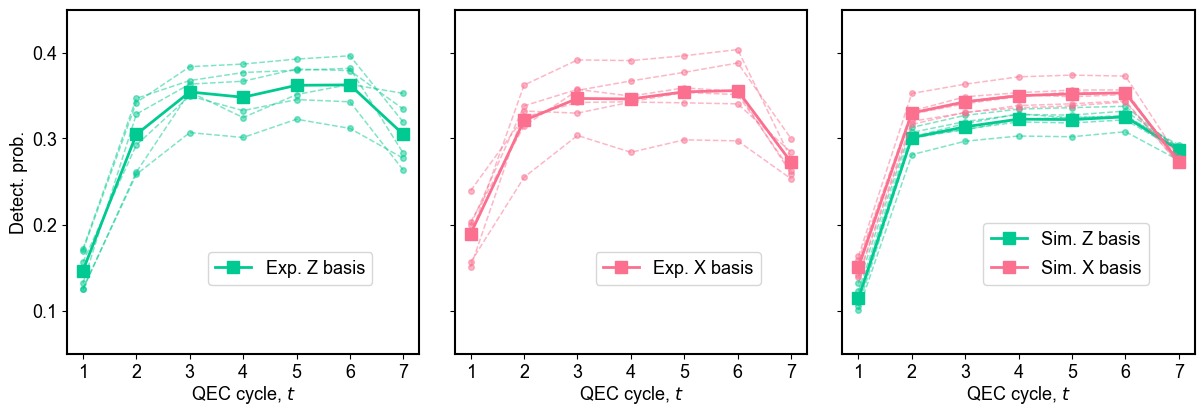

In [48]:
color_list = ["maroon", "teal", "dimGray", "#FF8C00", "#BC8F8F", "#7FFFAA"]

plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 12, 4
plt.rcParams.update({'font.size': 13})
fontsize = 13 ;

fig, ax = plt.subplots(1, 3)
ax11, ax12, ax13 = ax

spine_width = 1.5 ;

ax11.spines['top'].set_linewidth(spine_width)    
ax11.spines['bottom'].set_linewidth(spine_width) 
ax11.spines['left'].set_linewidth(spine_width)   
ax11.spines['right'].set_linewidth(spine_width)  
ax12.spines['top'].set_linewidth(spine_width)    
ax12.spines['bottom'].set_linewidth(spine_width) 
ax12.spines['left'].set_linewidth(spine_width)   
ax12.spines['right'].set_linewidth(spine_width)  
ax13.spines['top'].set_linewidth(spine_width)    
ax13.spines['bottom'].set_linewidth(spine_width) 
ax13.spines['left'].set_linewidth(spine_width)   
ax13.spines['right'].set_linewidth(spine_width)  

ax11.set_xlim(1-0.3, 7+0.3)
ax12.set_xlim(1-0.3, 7+0.3)
ax13.set_xlim(1-0.3, 7+0.3)
ax11.xaxis.set_major_locator(ticker.MultipleLocator(1))  
ax12.xaxis.set_major_locator(ticker.MultipleLocator(1))  
ax13.xaxis.set_major_locator(ticker.MultipleLocator(1))  
ax11.yaxis.set_major_locator(ticker.MultipleLocator(0.1))  
ax12.yaxis.set_major_locator(ticker.MultipleLocator(0.1))  
ax13.yaxis.set_major_locator(ticker.MultipleLocator(0.1))  
ax11.set_ylim(0.05, 0.45)
ax12.set_ylim(0.05, 0.45)
ax13.set_ylim(0.05, 0.45)
ax12.yaxis.set_tick_params(labelleft=False)
ax13.yaxis.set_tick_params(labelleft=False)

ax11.plot( range(1, max_num_cycles+2), exp_z_detect, color = (0/255,202/255,145/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Exp. Z basis" )
for i in range( n2 - len(remove_Z_list) ):
    ax11.plot( range(1, max_num_cycles+2), [item[i] for item in exp_per_z_detect], color = (0/255,202/255,145/255), \
              linestyle = "dashed", linewidth=1.1, alpha = 0.5, marker = 'o', markersize = 4)

ax11.legend(frameon=True, loc=(0.4, 0.2), labelspacing=0.4, fontsize=f'{fontsize}')
ax11.set_xlabel(r'QEC cycle, $t$', labelpad = 2) 
ax11.set_ylabel('Detect. prob.', labelpad = 3) 


ax12.plot( range(1, max_num_cycles+2), exp_x_detect, color = (251/255, 111/255, 143/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Exp. X basis" )
for i in range( n2 - len(remove_X_list) ):
    ax12.plot( range(1, max_num_cycles+2), [item[i] for item in exp_per_x_detect], color = (251/255, 111/255, 143/255), \
              linestyle = "dashed", linewidth=1.1, alpha = 0.5, marker = 'o', markersize = 4)

ax12.legend(frameon=True, loc=(0.4, 0.2), labelspacing=0.4, fontsize=f'{fontsize}')
ax12.set_xlabel(r'QEC cycle, $t$', labelpad = 2) 


ax13.plot( range(1, max_num_cycles+2), sim_z_detect, color = (0/255,202/255,145/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Sim. Z basis" )
for i in range( n2 - len(remove_X_list) ):
    ax13.plot( range(1, max_num_cycles+2), sim_per_z_detect[i], color = (0/255,202/255,145/255), linestyle = "dashed", \
              linewidth=1.1,  alpha = 0.5, marker = 'o', markersize = 4)
    
ax13.plot( range(1, max_num_cycles+2), sim_x_detect, color = (251/255, 111/255, 143/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Sim. X basis" )
for i in range( n2 - len(remove_X_list) ):
    ax13.plot( range(1, max_num_cycles+2), sim_per_x_detect[i], color = (251/255, 111/255, 143/255), linestyle = "dashed", \
              linewidth=1.1,  alpha = 0.5, marker = 'o', markersize = 4)
    

ax13.legend(frameon=True, loc=(0.4, 0.2), labelspacing=0.6, fontsize=f'{fontsize}', columnspacing=8.5, handlelength=2)
ax13.set_xlabel(r'QEC cycle, $t$', labelpad = 2) 


plt.subplots_adjust(left = 0.05, bottom = 0.13, top = 0.99, right = 0.99, hspace = 0.0, wspace = 0.1) 
plt.show()
# fig.savefig('Experimental_Figures/Detection_prob_18_6_3.pdf', format='pdf', facecolor='None')

## Logical-state preservation and error per cycle

In [49]:
set_T1 = { 0:44.7, 1:34.9, 2: 51.1, 3:45.3, 4:35.6, 5: 38.6, 6: 38.2,
          7: 34.4, 8: 44.4, 9: 55.0, 10: 50.8, 11: 48.6, 12: 39.5, 13: 38.6, 14: 37.2, 15: 37.9,
          16: 44.7, 17: 36.7, 18: 41.1, 19: 37.5, 20: 49.5, 21: 49.6, 22: 37.1, 23: 41.4, 24: 37.9,
          25: 45.4, 26: 42.3, 27: 57.8, 28: 35.3, 29: 34.2, 30: 33.5, 31: 39.9 }

set_Tphi = { 0: 21.0, 1: 55.1, 2: 13.8, 3: 17.0, 4: 29.6, 5: 26.1, 6: 63.4,
            7: 109.8, 8: 95.6, 9: 15.4, 10: 42.6, 11: 24.3, 12: 17.1, 13: 62.8, 14: 53.1, 15: 23.3,
            16: 17.9, 17: 18.0, 18: 41.4, 19: 14.7, 20: 64.1, 21: 69.2, 22: 44.5, 23: 52.5, 24: 54.2,
            25: 23.1, 26: 26.3, 27: 29.5, 28: 20.0, 29: 50.2, 30: 33.8, 31: 42.6 } ;

set_T2 = {key: 1 / ( 1/(2*set_T1[key]) + 1/set_Tphi[key] )  for key, _ in set_T1.items() }

T1_max = max(set_T1.values())
T2_max =  max(set_T2.values())

# T1 = 41.83 #us
# T_phi = 39.7 #us
# T2 = 1 / ( 1/(2*T1) + 1/T_phi )
cycle_time = 1.895 #us

def k_to_one(p, k):
    return 1-(1-p)**(1/k)

def physical_vs_cycle(cycle, T):
    t = cycle * 1.895

    return (1 - np.exp(-t/T))/2

def six_physical_vs_cycle(cycle, T):   
    p = physical_vs_cycle(cycle, T)
    return 1 - (1 - p)**k

## logical Z state

We fit using the relation $1-P(t) \propto  (1 - p_L)^{t}$.

In [50]:
cycle_t = np.arange(1, max_num_cycles+1) ;
cycle_interpo = np.linspace(1, max_num_cycles+1, 100) ;

In [52]:
eta = 1
exp_Z_logic_fid = 1 - eta * np.array( exp_Z_logic_error[0:] )
log_exp_Z_logic_fid = np.log(exp_Z_logic_fid)

sigma_exp_Z_logic_error = [ np.sqrt(item*(1-item)/set_exp_num_z[index]) for index, item in enumerate(exp_Z_logic_error[0:])];

# sigma_log_exp_Z_logic_fid = [1] * max_num_cycles ;
# sigma_log_exp_Z_logic_fid = [ sigma_exp_Z_logic_error[i]/exp_Z_logic_fid[i] for i in range(0, max_num_cycles) ] ;
# exp_Wz = 1/np.array(sigma_log_exp_Z_logic_fid)**2

coeff, cov = np.polyfit(cycle_t, log_exp_Z_logic_fid, deg=1, cov=True)

log_A, log_B = coeff  # [Slope, intercept]

sigma_log_A = np.sqrt(cov[0,0]) ;
exp_sigma_pL_z = np.exp(log_A) * sigma_log_A ;  #  

A = np.exp(log_A)
B = np.exp(log_B)

exp_Z_logic_error_percycle = (1 - A)/eta
print(f"Logical error rate for six logical qubits per cycle = {exp_Z_logic_error_percycle} ± {exp_sigma_pL_z}")

# The fit line
pred_exp_Z_logic_error = (1 - B * A**(cycle_interpo))/eta

Logical error rate for six logical qubits per cycle = 0.3854098400595082 ± 0.004963217101673896


In [53]:
exp_Z_logic_error_perbit_percycle = k_to_one(exp_Z_logic_error_percycle, k)

exp_sigma_pL_z_perbit = exp_sigma_pL_z / (k * (1 - exp_Z_logic_error_percycle )**(1-1/k)    )

print("Logical error per logical qubit per cycle:", 
      exp_Z_logic_error_perbit_percycle )
print("The error bar is:",  exp_sigma_pL_z_perbit)

Logical error per logical qubit per cycle: 0.07792920418141625
The error bar is: 0.0012410540229508315


## logical X state

In [54]:
exp_X_logic_fid = 1 - np.array( exp_X_logic_error[0:] )
log_exp_X_logic_fid = np.log(exp_X_logic_fid)

sigma_exp_X_logic_error = [ np.sqrt(item*(1-item)/set_exp_num_x[index]) for index, item in enumerate(exp_X_logic_error[0:])];

coeff, cov = np.polyfit(cycle_t, log_exp_X_logic_fid, deg=1,  cov=True)

log_A, log_B = coeff 

sigma_log_A = np.sqrt(cov[0,0]) ;
exp_sigma_pL_x = np.exp(log_A) * sigma_log_A ;  #   

A = np.exp(log_A)
B = np.exp(log_B)

exp_X_logic_error_percycle = 1 - A
print(fr"Logical error rate for six logical qubits per cycle = {exp_X_logic_error_percycle} ± {exp_sigma_pL_x} ")

# The fit line
pred_exp_X_logic_error = (1 - B * A**(cycle_interpo))

Logical error rate for six logical qubits per cycle = 0.3835013611295095 ± 0.008564097245984975 


In [55]:
exp_X_logic_error_perbit_percycle = k_to_one(exp_X_logic_error_percycle, k)

exp_sigma_pL_x_perbit = exp_sigma_pL_x / (k * (1 - exp_X_logic_error_percycle )**(1-1/k)    )

print("Logical error per logical qubit per cycle:", 
      exp_X_logic_error_perbit_percycle )
print("The error bar is:",  exp_sigma_pL_x_perbit)

Logical error per logical qubit per cycle: 0.07745260470069171
The error bar is: 0.0021359294541857476


In [56]:
Exp_XZ = (exp_X_logic_error_perbit_percycle + exp_Z_logic_error_perbit_percycle) / 2
print("The experimental average logical error per cycle is:", Exp_XZ)
Exp_bar_XZ = np.sqrt(exp_sigma_pL_x_perbit**2 + exp_sigma_pL_z_perbit**2)/2
print("The experimental average bar of the logical error per cycle is:", Exp_bar_XZ)

The experimental average logical error per cycle is: 0.07769090444105398
The experimental average bar of the logical error per cycle is: 0.0012351527963313555


## Pauli+ sim results

In [57]:
sim_Z_logic_fid = 1 - np.array( sim_Z_logic_error[0:] )
log_sim_Z_logic_fid = np.log(sim_Z_logic_fid)

sigma_sim_Z_logic_error = [ np.sqrt(item*(1-item)/set_sim_num_z[index]) for index, item in enumerate(sim_Z_logic_error[0:])];

coeff, cov = np.polyfit(cycle_t, log_sim_Z_logic_fid, deg=1, cov=True)

log_A, log_B = coeff 

sigma_log_A = np.sqrt(cov[0,0]) ;
sim_sigma_pL_z = np.exp(log_A) * sigma_log_A ;  #   

A = np.exp(log_A)
B = np.exp(log_B)

sim_Z_logic_error_percycle = 1 - A
print(fr"Logical error rate for six logical qubits per cycle = {sim_Z_logic_error_percycle} ± {sim_sigma_pL_z} ")

# The fit line
pred_sim_Z_logic_error = (1 - B * A**(cycle_interpo))

Logical error rate for six logical qubits per cycle = 0.35978111766551957 ± 0.002848453284712127 


In [58]:
sim_Z_logic_error_perbit_percycle = k_to_one(sim_Z_logic_error_percycle, k)

sim_sigma_pL_z_perbit = sim_sigma_pL_z / (k * (1 - sim_Z_logic_error_percycle )**(1-1/k)    )

print("The logical error per logical qubit per cycle:", 
      sim_Z_logic_error_perbit_percycle )
print("The error bar is:",  sim_sigma_pL_z_perbit)

The logical error per logical qubit per cycle: 0.07162932613922801
The error bar is: 0.0006884157299835144


In [59]:
sim_X_logic_fid = 1 - np.array( sim_X_logic_error[1:] )
log_sim_X_logic_fid = np.log(sim_X_logic_fid)

sigma_sim_X_logic_error = [ np.sqrt(item*(1-item)/set_sim_num_x[index]) for index, item in enumerate(sim_X_logic_error[1:])];

coeff, cov = np.polyfit(cycle_t[1:], log_sim_X_logic_fid, deg=1, cov=True)

log_A, log_B = coeff 

sigma_log_A = np.sqrt(cov[0,0]) ;
sim_sigma_pL_x = np.exp(log_A) * sigma_log_A ;  #   

A = np.exp(log_A)
B = np.exp(log_B)

sim_X_logic_error_percycle = 1 - A
print(fr"Logical error rate for six logical qubits per cycle = {sim_X_logic_error_percycle} ± {sim_sigma_pL_x} ")

# The fit line
pred_sim_X_logic_error = (1 - B * A**(cycle_interpo))

Logical error rate for six logical qubits per cycle = 0.4008892607944584 ± 0.0055165644548011575 


In [60]:
sim_X_logic_error_perbit_percycle = k_to_one(sim_X_logic_error_percycle, k)

sim_sigma_pL_x_perbit = sim_sigma_pL_x / (k * (1 - sim_X_logic_error_percycle )**(1-1/k)    )

print("The logical error per logical qubit per cycle:", 
      sim_X_logic_error_perbit_percycle )
print("The error bar is:",  sim_sigma_pL_x_perbit)

The logical error per logical qubit per cycle: 0.08184109487918234
The error bar is: 0.001409055802317189


## Pauli sim results

In [ ]:
pauli_sim_Z_logic_fid = 1 - np.array( pauli_sim_Z_logic_error[0:] )
log_pauli_sim_Z_logic_fid = np.log(pauli_sim_Z_logic_fid)

sigma_pauli_sim_Z_logic_error = [ np.sqrt(item*(1-item)/set_pauli_sim_num_z[index])  \
                               for index, item in enumerate(pauli_sim_Z_logic_error[0:])];

coeff, cov = np.polyfit(cycle_t, log_pauli_sim_Z_logic_fid, deg = 1, cov = True)

log_A, log_B = coeff 

pauli_sigma_log_A = np.sqrt(cov[0,0]) ;
pauli_sim_sigma_pL_z = np.exp(log_A) * pauli_sigma_log_A ;   

A = np.exp(log_A)
B = np.exp(log_B)

pauli_sim_Z_logic_error_percycle = 1 - A
print(fr"Logical error rate for six logical qubits per cycle = {pauli_sim_Z_logic_error_percycle} ± {pauli_sim_sigma_pL_z} ")

# The fit line
pred_pauli_sim_Z_logic_error = (1 - B * A**(cycle_interpo))

In [ ]:
pauli_sim_Z_logic_error_perbit_percycle = k_to_one(pauli_sim_Z_logic_error_percycle, k)

pauli_sim_sigma_pL_z_perbit = pauli_sim_sigma_pL_z / ( k * (1 - pauli_sim_Z_logic_error_percycle )**(1-1/k)  )

print("The logical error per logical qubit per cycle:", 
      pauli_sim_Z_logic_error_perbit_percycle )
print("The error bar is:",  pauli_sim_sigma_pL_z_perbit)

In [ ]:
pauli_sim_X_logic_fid = 1 - np.array( pauli_sim_X_logic_error[0:] )
log_pauli_sim_X_logic_fid = np.log(pauli_sim_X_logic_fid)

sigma_pauli_sim_X_logic_error = [ np.sqrt(item*(1-item)/set_pauli_sim_num_x[index])  \
                                 for index, item in enumerate(pauli_sim_X_logic_error[0:])];

coeff, cov = np.polyfit(cycle_t, log_pauli_sim_X_logic_fid, deg=1, cov=True)

log_A, log_B = coeff 

pauli_sigma_log_A = np.sqrt(cov[0,0]) ;
pauli_sim_sigma_pL_x = np.exp(log_A) * pauli_sigma_log_A ;  #   

A = np.exp(log_A)
B = np.exp(log_B)

pauli_sim_X_logic_error_percycle = 1 - A
print(fr"Logical error rate for four logical qubits per cycle = {pauli_sim_X_logic_error_percycle} ± {pauli_sim_sigma_pL_x} ")

# The fit line
pred_pauli_sim_X_logic_error = (1 - B * A**(cycle_interpo))

In [ ]:
pauli_sim_X_logic_error_perbit_percycle = k_to_one(pauli_sim_X_logic_error_percycle, k)

pauli_sim_sigma_pL_x_perbit = pauli_sim_sigma_pL_x / ( k * (1 - pauli_sim_X_logic_error_percycle )**(1-1/k)  )

print("The logical error per logical qubit per cycle:", 
      pauli_sim_X_logic_error_perbit_percycle )
print("The error bar is:",  pauli_sim_sigma_pL_x_perbit)

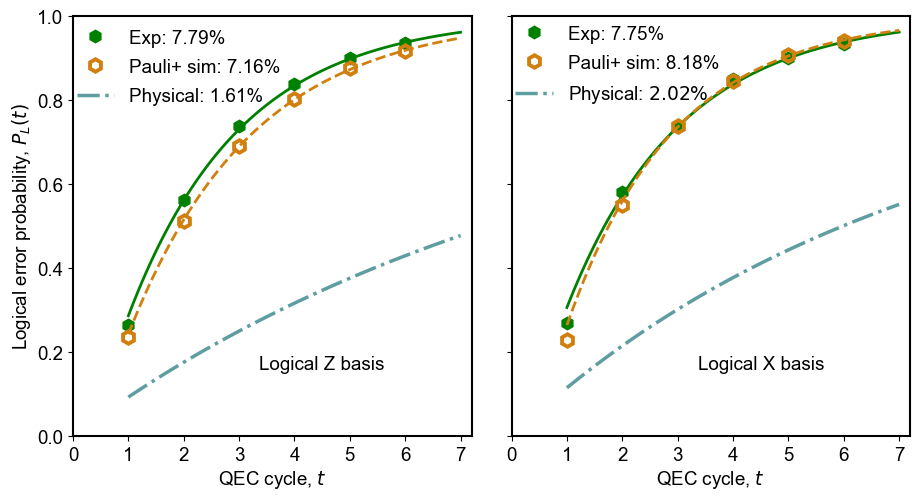

In [61]:
color_list = ["maroon", "teal", "dimGray", "#FF8C00", "#BC8F8F", "#7FFFAA"]

marker_list = [ "o", "s", "d", "<", "p", "H" ]

plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 13.5})
fontsize = 13.5 ;

fig, (ax11, ax21) = plt.subplots( 1, 2,              
    figsize=(9.2, 5)   
)

spine_width = 1.5 ;

ax11.spines['top'].set_linewidth(spine_width)    
ax11.spines['bottom'].set_linewidth(spine_width) 
ax11.spines['left'].set_linewidth(spine_width)   
ax11.spines['right'].set_linewidth(spine_width)  
ax21.spines['top'].set_linewidth(spine_width)    
ax21.spines['bottom'].set_linewidth(spine_width) 
ax21.spines['left'].set_linewidth(spine_width)   
ax21.spines['right'].set_linewidth(spine_width)  

ax11.set_xlim(0, 7.2)
ax11.xaxis.set_major_locator(ticker.MultipleLocator(1))  

ax11.set_ylim(0, 1)

ax11.plot( cycle_t, exp_Z_logic_error, color = "green", linestyle = "", linewidth = 2, \
        marker = 'h', markersize = 9, label = f'Exp: {exp_Z_logic_error_perbit_percycle*100:.2f}%' )

ax11.plot( cycle_interpo, pred_exp_Z_logic_error, color = 'green', linestyle = "solid", linewidth=2)

ax11.plot( cycle_t, sim_Z_logic_error, color = '#d1800f', linestyle = "", linewidth=1, 
        marker = 'h', markerfacecolor='none', markeredgewidth=2.8, markersize = 9, \
                              label = f'Pauli+ sim: {sim_Z_logic_error_perbit_percycle*100:.2f}%' )

ax11.plot( cycle_interpo, pred_sim_Z_logic_error, color = '#d1800f', linestyle = "dashed", linewidth=2)

# ax11.plot( cycle_t, pauli_sim_Z_logic_error, color = 'purple', linestyle = "", linewidth=1, 
#         marker = 'h', markerfacecolor='none', markeredgewidth=2.8, markersize = 9, \
#                               label = f'Pauli sim: {pauli_sim_Z_logic_error_perbit_percycle*100:.2f}%' )

# ax11.plot( cycle_interpo, pred_pauli_sim_Z_logic_error, color = 'purple', linestyle = "dashed", linewidth=2)

ax11.plot( cycle_interpo, six_physical_vs_cycle(cycle_interpo, T1_max), color = '#5F9EA0', 
          linestyle = "-.", linewidth=2.5, label = f'Physical: {100*physical_vs_cycle(1, T1_max):.2f}%')

#-----------------------------------------------------------------------------------------------------------------------------------
ax11.legend(frameon=False, loc=(-0.01, 0.77), ncol=1, columnspacing=1.5, labelspacing=0.6, handlelength=2, fontsize=f'{fontsize}')

ax11.text(4.5, 0.15, "Logical Z basis", fontsize=f'{fontsize}', color='black', ha='center', va='bottom')
ax11.set_xlabel(r'QEC cycle, $t$', labelpad = 3) 
ax11.set_ylabel(r'Logical error probability, $P_L(t)$', labelpad = 3) 

#---------------------------------------------------------------------------
ax21.set_xlim(0, 7.2)
ax21.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax21.yaxis.set_tick_params(labelleft=False)
ax21.set_ylim(0, 1)

ax21.plot( cycle_t, exp_X_logic_error, color = 'green', linestyle = "", linewidth=2, 
        marker = 'h', markersize = 9, label = f'Exp: {exp_X_logic_error_perbit_percycle*100:.2f}%' )

ax21.plot( cycle_interpo, pred_exp_X_logic_error, color = 'green', linestyle = "solid", linewidth = 2)

ax21.plot( cycle_t, sim_X_logic_error, color = '#d1800f', linestyle = "", linewidth=1, 
        marker = 'h', markerfacecolor='none', markeredgewidth=2.8, markersize = 9, 
                              label = f'Pauli+ sim: {sim_X_logic_error_perbit_percycle*100:.2f}%' )

ax21.plot( cycle_interpo, pred_sim_X_logic_error, color = '#d1800f', linestyle = "dashed", linewidth = 2)

ax21.plot( cycle_interpo, six_physical_vs_cycle(cycle_interpo, T2_max), color = '#5F9EA0', 
          linestyle = "-.", linewidth = 2.5, label = f'Physical: ${100*physical_vs_cycle(1, T2_max):.2f}\%$')
#-----------------------------------------------------------------------------------------------------------------
ax21.legend(frameon = False, loc=(-0.01, 0.77), ncol=1, columnspacing=1.5, labelspacing=0.6, handlelength = 2, fontsize=f'{fontsize}')

ax21.text(4.5, 0.15, "Logical X basis", fontsize=f'{fontsize}', color='black', ha='center', va='bottom')
ax21.set_xlabel(r'QEC cycle, $t$', labelpad = 3) 

plt.subplots_adjust(left = 0.08, bottom = 0.12, top = 0.96, right = 0.99,  hspace = 0.0, wspace = 0.1) 
plt.show()
# fig.savefig('Experimental_Figures/Logical_error_18_6_3.pdf', format='pdf', facecolor='None')